In [1]:
# ch4-2.py
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)

In [2]:
# 데이터로드 (NHIS_OPEN_GJ_2017.csv : 데이터 원본 파일)
# encoding : 윈도우즈 환경에서의 한글 처리
# engine : python 3.6에서 한글이 포함된 파일이름 사용
%time rawData_org = pd.read_csv('datasets/국민건강정보/NHIS_OPEN_GJ_2017.csv', encoding='CP949', engine='python')

Wall time: 24.9 s


In [3]:
# 원본데이터의 튜플 수와 컬럼수 출력
rawData_org.shape

(1000000, 34)

In [4]:
# 의사결정트리에 사용할 속성리스트
feature_columns_to_use = ['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)',
                    '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '트리글리세라이드', 'HDL콜레스테롤',
                    'LDL콜레스테롤', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부']

rawData = rawData_org[feature_columns_to_use]

In [5]:
# 속성값이 NULL인 튜플 제외
rawData = rawData.dropna()

# 인덱스 재설정
rawData.reset_index(inplace=True, drop=True)

# 원본데이터의 튜플 수와 컬럼수 출력
rawData.shape

(990910, 22)

In [6]:
import random as rd  # 샘플링을 위한 random 패키지 임포트

# 1) 샘플링을 통한 수량 축소
# 원본데이터 중 50,000개를 튜플만 샘플링
# len() : 데이터프레임의 크기를 구하는 함수
sample_idx = rd.sample(range(0, len(rawData)), 50000)

# 인덱스 값 정렬(오름차순)
sample_idx.sort()

sample_idx

[1,
 23,
 55,
 58,
 68,
 74,
 82,
 116,
 120,
 122,
 123,
 144,
 155,
 166,
 185,
 198,
 212,
 223,
 228,
 234,
 276,
 291,
 311,
 312,
 315,
 316,
 319,
 351,
 378,
 405,
 424,
 449,
 467,
 473,
 528,
 535,
 543,
 548,
 549,
 554,
 577,
 595,
 599,
 604,
 608,
 646,
 655,
 656,
 677,
 696,
 700,
 701,
 720,
 731,
 753,
 805,
 841,
 854,
 864,
 870,
 876,
 880,
 889,
 905,
 910,
 938,
 943,
 949,
 1006,
 1036,
 1037,
 1067,
 1072,
 1081,
 1096,
 1114,
 1132,
 1155,
 1165,
 1172,
 1180,
 1187,
 1199,
 1239,
 1265,
 1271,
 1334,
 1366,
 1377,
 1384,
 1422,
 1440,
 1451,
 1462,
 1467,
 1495,
 1543,
 1547,
 1603,
 1609,
 1616,
 1618,
 1644,
 1662,
 1686,
 1694,
 1709,
 1739,
 1755,
 1813,
 1838,
 1841,
 1845,
 1862,
 1903,
 1927,
 1948,
 1994,
 1997,
 2035,
 2043,
 2069,
 2074,
 2112,
 2123,
 2132,
 2165,
 2173,
 2188,
 2191,
 2196,
 2218,
 2221,
 2230,
 2238,
 2254,
 2293,
 2329,
 2373,
 2397,
 2411,
 2424,
 2445,
 2463,
 2472,
 2516,
 2544,
 2559,
 2575,
 2576,
 2578,
 2586,
 2589,
 2608

In [7]:
# 샘플링 된 인덱스로 구성된 샘플 데이터프레임 생성
rawData_sample = rawData.loc[sample_idx]

rawData_sample.reset_index(inplace=True, drop=True) #  인덱스 재설정

# 첫 10개의 행만 출력
rawData_sample.head(10)

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
0,2,8,150.0,45.0,73.4,1.2,1.0,1.0,1.0,110.0,...,82.0,62.0,176.0,1.0,0.9,16.0,13.0,10.0,1.0,0.0
1,1,9,170.0,80.0,88.0,1.2,1.2,1.0,1.0,130.0,...,231.0,51.0,53.0,1.0,1.1,25.0,32.0,65.0,3.0,1.0
2,1,16,155.0,55.0,83.0,0.5,0.8,1.0,1.0,147.0,...,103.0,43.0,116.0,1.0,0.9,24.0,28.0,21.0,1.0,0.0
3,1,9,175.0,80.0,84.0,1.2,1.0,1.0,1.0,130.0,...,97.0,52.0,127.0,1.0,1.1,29.0,22.0,25.0,2.0,1.0
4,1,10,165.0,70.0,92.0,1.5,1.5,1.0,1.0,126.0,...,246.0,57.0,99.0,1.0,0.9,27.0,35.0,159.0,3.0,1.0
5,1,8,175.0,75.0,88.0,0.5,0.6,1.0,1.0,110.0,...,101.0,93.0,121.0,1.0,1.1,24.0,27.0,32.0,3.0,1.0
6,1,13,160.0,65.0,84.0,0.7,0.7,1.0,1.0,106.0,...,115.0,45.0,113.0,1.0,1.0,24.0,29.0,31.0,3.0,1.0
7,1,9,175.0,85.0,93.0,1.5,1.5,1.0,1.0,128.0,...,268.0,54.0,141.0,1.0,1.2,24.0,28.0,28.0,2.0,1.0
8,2,9,155.0,55.0,74.0,0.9,1.0,1.0,1.0,131.0,...,91.0,64.0,106.0,1.0,0.8,18.0,11.0,19.0,1.0,1.0
9,1,12,170.0,70.0,93.0,0.9,1.0,1.0,1.0,106.0,...,94.0,50.0,132.0,1.0,0.8,18.0,13.0,25.0,1.0,1.0


In [8]:
rawData_sample.shape

(50000, 22)

In [9]:
# nonnumeric(categorical) 속성을 numeric 데이터로 변환
nonnumeric_columns = ['성별코드','음주여부']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for feature in nonnumeric_columns:
    rawData_sample[feature] = le.fit_transform(rawData_sample[feature])   

In [10]:
# 소스 데이터프레임에서 분류(classification)을 위한 속성 집합
X = rawData_sample.loc[:, feature_columns_to_use[:-1]]  
y = rawData_sample.loc[:, '음주여부']  # 분류 클래스(class)

from sklearn.model_selection import train_test_split  # 분석모형 선택에 관련된 모듈
    
# 자동으로 데이터셋을 트레이닝셋과 테스트셋으로 분리해주는 함수로
# 트레이닝셋과 데이터셋의 비율을 7:3으로 세팅함
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Scikit-Learn 패키지 : 머신 러닝 교육 및 실무를 위한 패키지로 샘플 데이터셋,
# 다양한 기계학습 기법에 대한 함수 등을 포함하고 있음
from sklearn.tree import DecisionTreeClassifier  # 의사결정트리 기법에 관련된 모듈

# DecisionTreeClassifier() : 의사결정트리를 생성하는 함수
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
decision_tree

In [11]:
# RMSLE 계산하는 사용자정의 함수
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values) :
    # 넘파이로 배열 형태로 변환
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제값에 1을 더하고 로그를 씌움
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 함
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균값 구함
    mean_difference = difference.mean()
    
    # 다시 루트를 씌움
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [13]:
# KFold 교차검증
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

%time score = cross_val_score(decision_tree, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()

# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

Wall time: 900 ms
Score= 0.37851


In [14]:
# fit() : 트레이닝 데이터셋을 대상으로 의사결정트리 학습 진행
decision_tree.fit(X_train, y_train)

In [15]:
# 점수 출력
print("Train Set Score1 : {:.2f}".format(decision_tree.score(X_train, y_train)))
print("Test Set Score1 : {:.2f}".format(decision_tree.score(X_test, y_test)))

Train Set Score1 : 0.70
Test Set Score1 : 0.71


In [16]:
from sklearn.metrics import accuracy_score  # 분류 정확도(classification accuracy)를 계산하는 모듈

# tree.predict() 함수를 활용하여 의사결정트리를 대상으로 테스트셋을 예측
y_pred_tr = decision_tree.predict(X_test)

# accuracy_score() 함수를 활용하여 테스트셋의 실제 클래스와 예측된 클래스 간 정확도 측정
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.71


In [17]:
# 속성(feature) 별 중요도를 저장하는 데이터프레임 생성 
sel_feature = pd.DataFrame({'중요도' : decision_tree.feature_importances_}, index = feature_columns_to_use[:-1])

# 중요도의 내림차순으로 정렬
sel_feature.sort_values(by='중요도', ascending=False)

,중요도
성별코드,0.507341
연령대코드(5세단위),0.301930
감마지티피,0.103226
흡연상태,0.087503
허리둘레,0.000000
HDL콜레스테롤,0.000000
신장(5Cm단위),0.000000
(혈청지오티)ALT,0.000000
(혈청지오티)AST,0.000000
혈청크레아티닌,0.000000


In [ ]:
# 예측결과와 실제결과 비교
appData_anal_comp = pd.DataFrame(data={'actual': y_test, 'pred': y_pred_tr}, columns={'actual', 'pred'})
appData_anal_comp

In [ ]:
# 예측 클래스와 클래스 예측확률을 X_test 데이터프레임에 붙임
X_test['음주여부'] = y_test
X_test['음주여부예측'] = y_pred_tr

X_test['음주확률'] = y_pred_tr_prob[:,1]

X_test

In [18]:
# 의사결정트리 시각화를 위한 작업
# 트리 시각화를 위한 export_graphviz 모듈 임포트 (이를 위해 graphviz 별도 설치 필요)
from sklearn.tree import export_graphviz
import pydotplus  # graphviz의 dot language 와의 인터페이스를 제공하는 패키지 임포트
from IPython.display import Image  # IPython의 display와 관련된 Public API

x_list = list(X.columns)
y_list = list(y.drop_duplicates(inplace=False))

In [19]:
# export_graphviz() : 의사결정트리에 대한 graphviz dot data를 생성하는 함수
dot_data = export_graphviz(decision_tree, out_file=None, feature_names=x_list,
                          class_names=str(y_list), filled=True, rounded=True, special_characters=True)

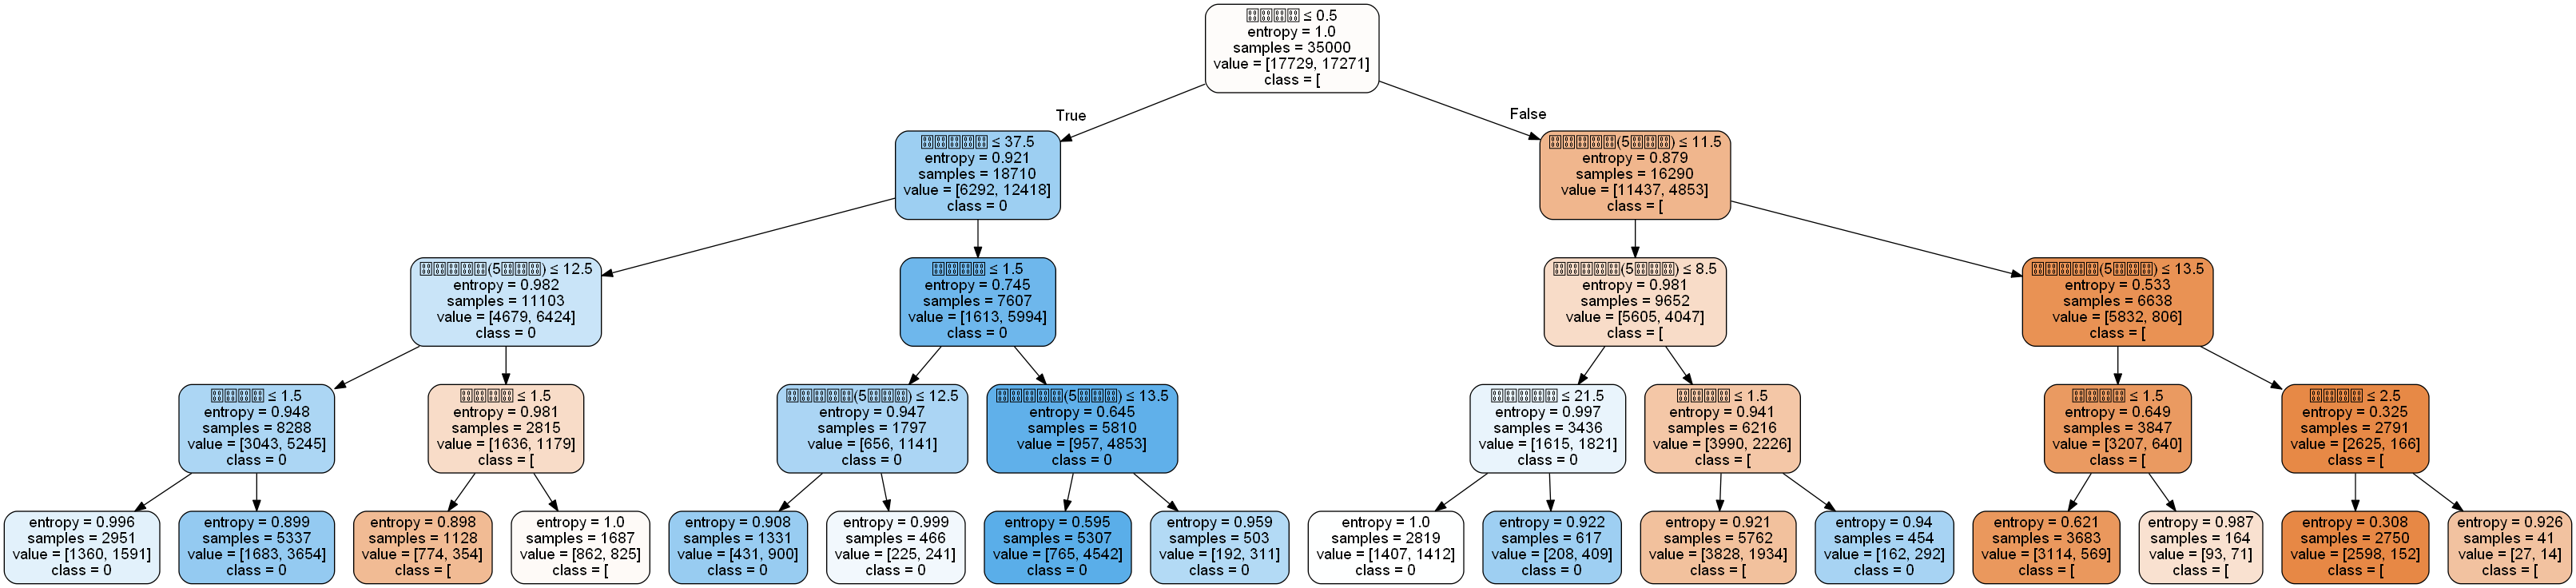

In [20]:
# matplotlib.rc('font', family='AppleGothic')
graph = pydotplus.graph_from_dot_data(dot_data)  # graphviz의 dot data로부터 트리 그래프 생성

# 트리 그래프를 위한 png 이미지 생성 및 출력
Image(graph.create_png())